Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# %matplotlib inline

In [10]:
data = pd.read_csv("movie_metadata_cleaned.csv")

In [12]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

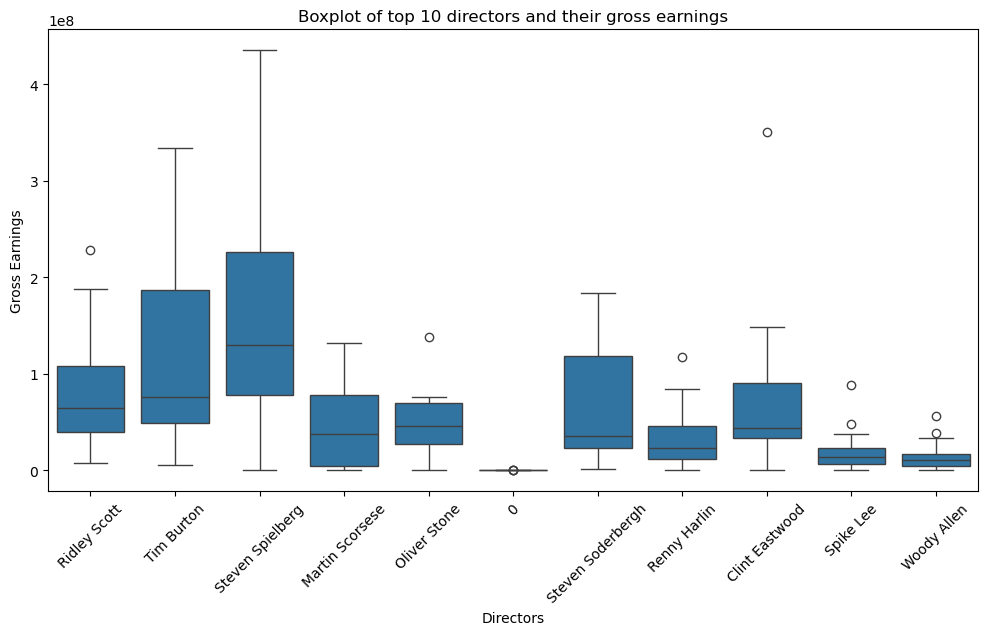

In [100]:
# Get the directors with most movies 
director_movie_count = data.groupby('director_name').size().reset_index(name='Movie_Count')

# Sort directors with the most movies directed in descending order
director_movie_count = director_movie_count.sort_values(by='Movie_Count', ascending=False)

# Display the top 10 directors with the most movies directed
top_10_directors = director_movie_count.head(11)  

# Filter to include only the top 10 directors
top_10_movies = data[data['director_name'].isin(top_10_directors['director_name'])]

# Boxplot with their gross earnings
plt.figure(figsize=(12, 6))
sns.boxplot(x='director_name', y='gross', data=top_10_movies)
plt.title('Boxplot of top 10 directors and their gross earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Directors')
plt.xticks(rotation=45)
plt.show()


## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

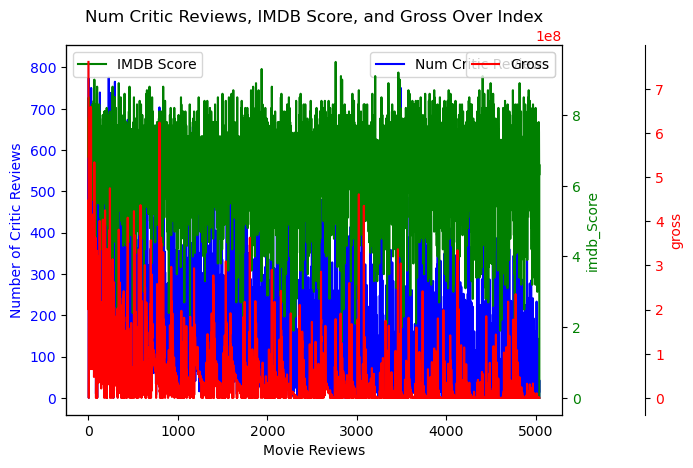

In [134]:
# Figure and axis 
fig, ax1 = plt.subplots()

# Plot num_critic_for_reviews on the primary y-axis
sns.lineplot(x=data.index, y='num_critic_for_reviews', data=data, ax=ax1, color='blue', label='Num Critic Reviews')
ax1.set_ylabel('Number of Critic Reviews', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot imdb_score on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=data.index, y='imdb_score', data=data, ax=ax2, color='green', label='IMDB Score')
ax2.set_ylabel('imdb_Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Plot gross on third y-axis
ax3 = ax1.twinx()
# Offset the position of the third y-axis
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x=data.index, y='gross', data=data, ax=ax3, color='red', label='Gross')
ax3.set_ylabel('gross', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Set the labels for x-axis
ax1.set_xlabel('Movie Reviews')

plt.title('Num Critic Reviews, IMDB Score, and Gross Over Index')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [98]:
# Subtract gross and budget 
data["Sales"] = data['gross'].sub(data['budget'])
data.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## Which directors garnered the most total sales?

In [78]:
# Get the directors with total sales  
director_total_sales = data.groupby('director_name')['Sales'].sum().reset_index()

# Sort the directors by total Sales 
director_sales_sorted = director_total_sales.sort_values(by='Sales', ascending=False)

# Display the directors with most total Sales
director_sales_sorted.head()

,director_name,Sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

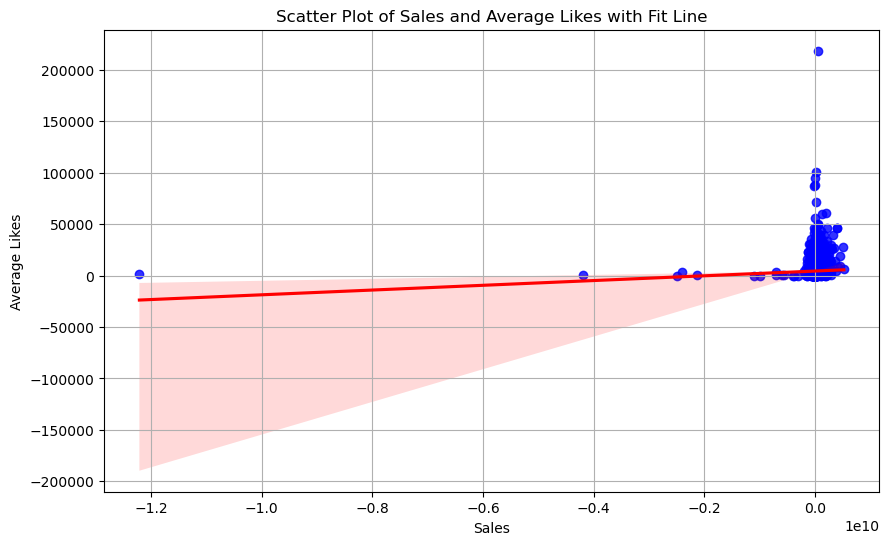

In [24]:
# Calculate average likes
data['average_likes'] = data[['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']].mean(axis=1)

# Scatterplot 
plt.figure(figsize=(10, 6))
sns.regplot(x='Sales', y='average_likes', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel('Sales')
plt.ylabel('Average Likes')
plt.title('Scatter Plot of Sales and Average Likes with Fit Line')
plt.grid(True)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

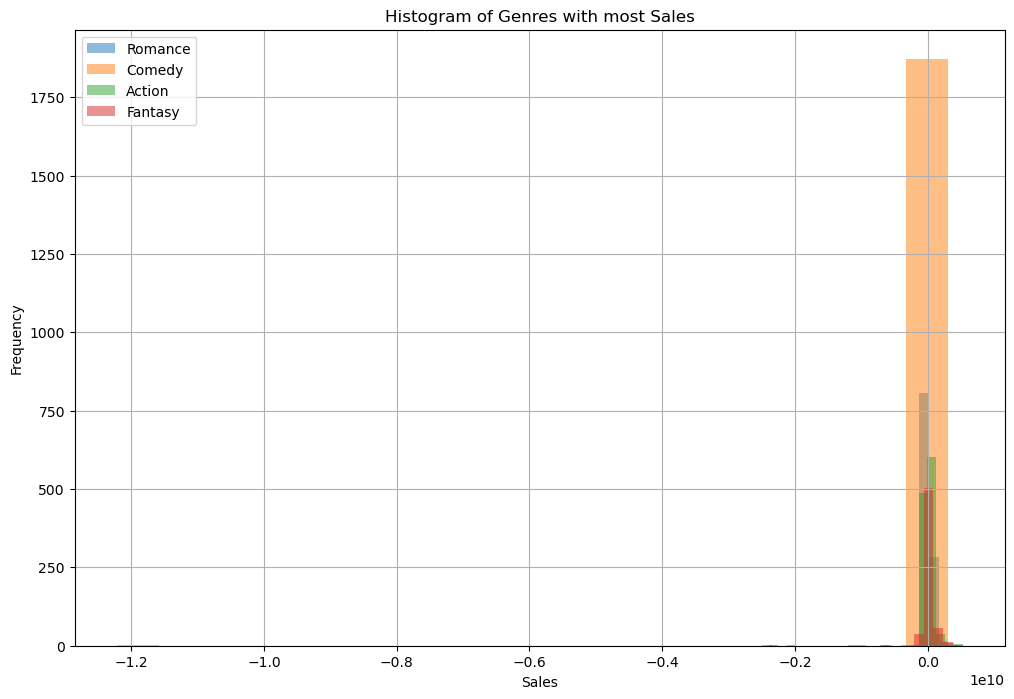

In [60]:
# Genres
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Filter data of genres
genre_data = {}
for genre in genres:
    genre_data[genre] = data[data['genres'].str.contains(genre, case=False, na=False)]['Sales']

# Plot histograms
plt.figure(figsize=(12, 8))

# Plot each genre's sales as a histogram on the same axis
for genre in genres:
    plt.hist(genre_data[genre], bins=20, alpha=0.5, label=genre)

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Genres with most Sales')
plt.legend()
plt.grid(True)
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [58]:
# Get average of actor likes 
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Display the average_actor_likes new column 
(data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']].head())

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,average_actor_likes
0,1000.0,936.0,855.0,930.333333
1,40000.0,5000.0,1000.0,15333.333333
2,11000.0,393.0,161.0,3851.333333
3,27000.0,23000.0,23000.0,24333.333333
4,131.0,12.0,0.0,47.666667


## Copying the whole dataframe

In [46]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [54]:
# Integer columns 
int_cols = df.select_dtypes(include=['int64'])

# Min-Max Normalization
df[int_cols.columns] = (int_cols - numeric_cols.min()) / (int_cols.max() - int_cols.min())

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,0.000397,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


In [56]:
# Float columns
float_cols = df.select_dtypes(include=['float64'])

# Apply Min-Max Normalization
df[float_cols.columns] = (float_cols - float_cols.min()) / (float_cols.max() - float_cols.min())

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
